# 1D Variability hypothesis testing for HBEC IFN experiment

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pybedtools import BedTool
import pickle as pkl
%matplotlib inline

In [7]:
a=5

In [2]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.6-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq/')
import encode
import memento

In [3]:
data_path = '/data_volume/memento/hbec/'

In [3]:
a=5

In [2]:
type('ta') == str

True

### Read the processed RNA data

Focus on the club and bc/club cells and type I interferons for now.

Encode the timestamps to integers.

In [12]:
adata_processed = sc.read(data_path + 'HBEC_type_I_processed.h5ad')

In [5]:
adata = sc.read(data_path + 'HBEC_type_I_filtered_counts_deep.h5ad')

In [6]:
converter = {'basal/club':'BC', 'basal':'B', 'ciliated':'C', 'goblet':'G', 'ionocyte/tuft':'IT', 'neuroendo':'N', 'club':'club'}

In [7]:
adata.obs['ct'] = adata.obs['cell_type'].apply(lambda x: converter[x])
# adata_processed.obs['ct'] = adata_processed.obs['cell_type'].apply(lambda x: converter[x])

In [21]:
adata_processed.obs['filtered_expr'] = adata_processed[:, 'CXCL10'].X.reshape(-1)* (adata_processed.obs['time'] == '3')

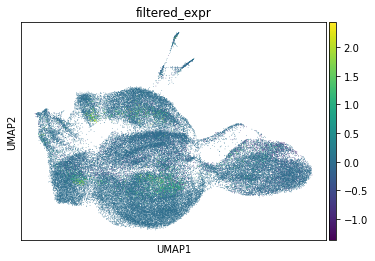

In [22]:
sc.pl.umap(adata_processed, color='filtered_expr')

### Setup memento

In [8]:
def assign_q(batch):
    
    if batch == 0:
        return 0.387*0.25
    elif batch == 1:
        return 0.392*0.25
    elif batch == 2:
        return 0.436*0.25
    else:
        return 0.417*0.25
    
adata.obs['q'] = adata.obs['batch'].apply(assign_q)

In [10]:
memento.setup_memento(adata, q_column='q', trim_percent=0.1)

Version 0.0.6


In [11]:
cts = ['C', 'B', 'BC']
tps = ['3', '6', '9', '24', '48']

stims = ['alpha', 'beta', 'gamma', 'lambda']

### Run memento for each subset, but stratify cell types, donor, and use time as a replicate

In [23]:
for stim in stims:
    
    print('Starting', stim)

    adata_stim = adata.copy()[
        adata.obs.ct.isin(['C', 'BC', 'B']) & \
        adata.obs.stim.isin([stim, 'control']), :].copy()
    stim_converter={'control':0, stim:1}
    adata_stim.obs['stim_indicator'] = adata_stim.obs['stim'].apply(lambda x: stim_converter[x])

    memento.create_groups(adata_stim, label_columns=['stim_indicator', 'donor', 'ct', 'time'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.5)
    print(adata_stim.shape)

    memento.ht_1d_moments(
        adata_stim, 
        formula_like='1 + stim_indicator + donor + ct',
        treatment_col='stim_indicator', 
        num_boot=10000, 
        verbose=1,
        num_cpus=93,
        resampling='bootstrap',
        approx=False)

    adata_stim.write(data_path + 'binary_test_stratified/{}_stratified.h5ad'.format(stim))

Starting alpha


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(19469, 9265)


[Parallel(n_jobs=93)]: Using backend LokyBackend with 93 concurrent workers.
[Parallel(n_jobs=93)]: Done  14 tasks      | elapsed:    8.8s
[Parallel(n_jobs=93)]: Done 264 tasks      | elapsed:   16.4s
[Parallel(n_jobs=93)]: Done 614 tasks      | elapsed:   27.3s
[Parallel(n_jobs=93)]: Done 1064 tasks      | elapsed:   40.7s
[Parallel(n_jobs=93)]: Done 1614 tasks      | elapsed:   56.6s
[Parallel(n_jobs=93)]: Done 2264 tasks      | elapsed:  1.3min
[Parallel(n_jobs=93)]: Done 3014 tasks      | elapsed:  1.6min
[Parallel(n_jobs=93)]: Done 3864 tasks      | elapsed:  2.1min
[Parallel(n_jobs=93)]: Done 4814 tasks      | elapsed:  2.5min
[Parallel(n_jobs=93)]: Done 5864 tasks      | elapsed:  3.0min
[Parallel(n_jobs=93)]: Done 7014 tasks      | elapsed:  3.6min
[Parallel(n_jobs=93)]: Done 8264 tasks      | elapsed:  4.2min
[Parallel(n_jobs=93)]: Done 9265 out of 9265 | elapsed:  4.8min finished
... storing 'memento_group' as categorical


Starting beta


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(19591, 9231)


[Parallel(n_jobs=93)]: Using backend LokyBackend with 93 concurrent workers.
[Parallel(n_jobs=93)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=93)]: Done 264 tasks      | elapsed:    9.7s
[Parallel(n_jobs=93)]: Done 614 tasks      | elapsed:   21.1s
[Parallel(n_jobs=93)]: Done 1064 tasks      | elapsed:   35.2s
[Parallel(n_jobs=93)]: Done 1614 tasks      | elapsed:   52.3s
[Parallel(n_jobs=93)]: Done 2264 tasks      | elapsed:  1.2min
[Parallel(n_jobs=93)]: Done 3014 tasks      | elapsed:  1.6min
[Parallel(n_jobs=93)]: Done 3864 tasks      | elapsed:  2.1min
[Parallel(n_jobs=93)]: Done 4814 tasks      | elapsed:  2.6min
[Parallel(n_jobs=93)]: Done 5864 tasks      | elapsed:  3.1min
[Parallel(n_jobs=93)]: Done 7014 tasks      | elapsed:  3.7min
[Parallel(n_jobs=93)]: Done 8264 tasks      | elapsed:  4.4min
[Parallel(n_jobs=93)]: Done 9231 out of 9231 | elapsed:  5.0min finished
... storing 'memento_group' as categorical


Starting gamma


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(18552, 9362)


[Parallel(n_jobs=93)]: Using backend LokyBackend with 93 concurrent workers.
[Parallel(n_jobs=93)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=93)]: Done 264 tasks      | elapsed:    8.7s
[Parallel(n_jobs=93)]: Done 614 tasks      | elapsed:   19.2s
[Parallel(n_jobs=93)]: Done 1064 tasks      | elapsed:   32.0s
[Parallel(n_jobs=93)]: Done 1614 tasks      | elapsed:   47.6s
[Parallel(n_jobs=93)]: Done 2264 tasks      | elapsed:  1.1min
[Parallel(n_jobs=93)]: Done 3014 tasks      | elapsed:  1.5min
[Parallel(n_jobs=93)]: Done 3864 tasks      | elapsed:  1.9min
[Parallel(n_jobs=93)]: Done 4814 tasks      | elapsed:  2.3min
[Parallel(n_jobs=93)]: Done 5864 tasks      | elapsed:  2.8min
[Parallel(n_jobs=93)]: Done 7014 tasks      | elapsed:  3.4min
[Parallel(n_jobs=93)]: Done 8264 tasks      | elapsed:  4.0min
[Parallel(n_jobs=93)]: Done 9362 out of 9362 | elapsed:  4.6min finished
... storing 'memento_group' as categorical


Starting lambda


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(17088, 9371)


[Parallel(n_jobs=93)]: Using backend LokyBackend with 93 concurrent workers.
[Parallel(n_jobs=93)]: Done  14 tasks      | elapsed:    2.5s
[Parallel(n_jobs=93)]: Done 264 tasks      | elapsed:    9.8s
[Parallel(n_jobs=93)]: Done 614 tasks      | elapsed:   21.1s
[Parallel(n_jobs=93)]: Done 1064 tasks      | elapsed:   35.1s
[Parallel(n_jobs=93)]: Done 1614 tasks      | elapsed:   51.9s
[Parallel(n_jobs=93)]: Done 2264 tasks      | elapsed:  1.2min
[Parallel(n_jobs=93)]: Done 3014 tasks      | elapsed:  1.6min
[Parallel(n_jobs=93)]: Done 3864 tasks      | elapsed:  2.0min
[Parallel(n_jobs=93)]: Done 4814 tasks      | elapsed:  2.5min
[Parallel(n_jobs=93)]: Done 5864 tasks      | elapsed:  3.1min
[Parallel(n_jobs=93)]: Done 7014 tasks      | elapsed:  3.7min
[Parallel(n_jobs=93)]: Done 8264 tasks      | elapsed:  4.3min
[Parallel(n_jobs=93)]: Done 9371 out of 9371 | elapsed:  5.1min finished
... storing 'memento_group' as categorical


### Run memento going through time, but stratify cell types and donor

In [24]:
for stim in stims:

    adata_stim = adata.copy()[
        adata.obs.ct.isin(cts) & \
        adata.obs.stim.isin([stim]), :].copy()
    time_converter={3:0, 6:1, 9:2, 24:3, 48:4}
    adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time_step', 'donor', 'ct'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.5)

    memento.ht_1d_moments(
        adata_stim, 
        formula_like='1 + time_step + donor + ct',
        treatment_col='time_step', 
        num_boot=10000, 
        verbose=1,
        num_cpus=93,
        resampling='bootstrap',
        approx=False)

    adata_stim.write(data_path + 'binary_test_stratified/{}_stratified_time.h5ad'.format(stim))

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
[Parallel(n_jobs=93)]: Using backend LokyBackend with 93 concurrent workers.
[Parallel(n_jobs=93)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=93)]: Done 264 tasks      | elapsed:    8.0s
[Parallel(n_jobs=93)]: Done 614 tasks      | elapsed:   17.2s
[Parallel(n_jobs=93)]: Done 1064 tasks      | elapsed:   28.8s
[Parallel(n_jobs=93)]: Done 1614 tasks      | elapsed:   42.8s
[Parallel(n_jobs=93)]: Done 2264 tasks      | elapsed:   59.4s
[Parallel(n_jobs=93)]: Done 3014 tasks      | elapsed:  1.3min
[Parallel(n_jobs=93)]: Done 3864 tasks      | elapsed:  1.7min
[Parallel(n_jobs=93)]: Done 4814 tasks      | elapsed:  2.1min
[Parallel(n_jobs=93)]: Done 5864 tasks      | elapsed:  2.5min
[Parallel(n_j